(1797, 64)
(8, 8)


<Figure size 640x480 with 0 Axes>

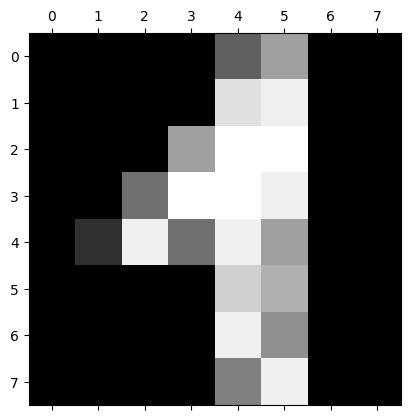

1

In [2]:
#from math import *
import numpy as np
import matplotlib.pyplot as plt
#import scipy.stats as st
import pandas as pd


from sklearn.datasets import load_digits

digits = load_digits()


print(digits.data.shape)
print(digits.images[1,].shape)

plt.gray() 
plt.matshow(digits.images[107]) 
plt.show() 
digits.target[107]

X = digits.data
Y = digits.target
np.unique(Y)# donne l'ensemble des valeurs distinctes prise par Y
Y[107]


In [3]:
# # Kmeans
from sklearn.cluster import KMeans
km= KMeans(n_clusters=10)
km.fit(X)

print(km.n_iter_) # Nombre d'itération avant convergence de l'algorithme
print(km.inertia_/X.shape[0]) # Variance/inertie intra (non normalisée par n contrairement au cours)
# c'est la quantité qu'on cherche à minimiser.


pd.crosstab(Y, km.labels_)


c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


13
648.396301949964


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,0,177,0,0,0,1,0,0,0
1,1,0,0,24,1,55,0,99,0,2
2,13,4,1,147,0,2,0,8,2,0
3,154,7,0,0,2,0,0,7,13,0
4,0,8,0,0,0,3,166,4,0,0
5,0,0,0,0,136,0,2,0,43,1
6,0,0,1,0,0,1,0,2,0,177
7,0,177,0,0,0,0,0,2,0,0
8,2,5,0,3,4,6,0,100,52,2


# Idéalement on aimerait avoir une matrice avec un seul chiffres non nul
# par ligne et par colonne (ce qui signifierait que (à permutation près)
# l'algorithme a regroupé (sans connaitre Y) chaque individu selin le label Y)
# 
# - Lecture en Ligne : Si il y a un seul chiffre non nul cela signifie que ces chiffres ont bien été
# identifié par l'algorithme
# - Lecture en colonne : Les chiffres qui ont plusieurs entrées non nulles importantes sont ceux qui (pour l'algorithme)
# se ressemblent beaucoup.


In [4]:
pd.crosstab(Y, km.labels_).sum(axis = 0)


col_0
0    176
1    208
2    179
3    174
4    149
5     87
6    169
7    224
8    249
9    182
dtype: int64

# Effectif de chaque classe: il est
# important de ne pas avoir une classe beaucoup plus petite ques les autres. 
# Ici même si il y a une classe avec un effectif moindre, l'ordre de grandeur 
# est le même dans chaque cas.

# Tracé des inerties: critère qui permet de décider du choix "optimal" de $K$
# Pour rappel on veut minimiser l'inertie intra classse: donnée par inertia_

# Alternativement, on peut utiliser la commande predict, qui permet de prédire le label de n'importe quel X 
# (qui n'est pas forcément dans les données d'apprentissage), simplement en calculant la distance de ce X 
# aux classes, et en lui affectant la classe qui a la distance la plus petite.


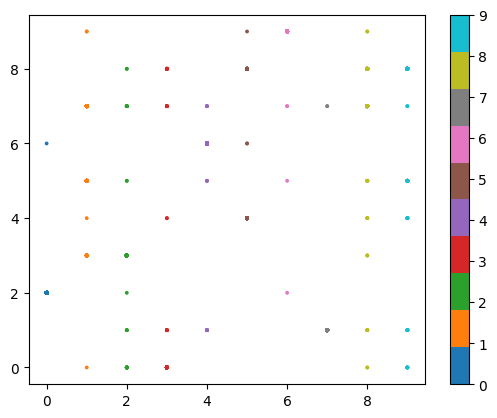

In [5]:
pred = km.predict(X)

plt.figure()
plt.scatter(Y,pred,c=Y, cmap=plt.get_cmap("tab10"), s=3)
plt.colorbar()
plt.show()


c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\valen\a

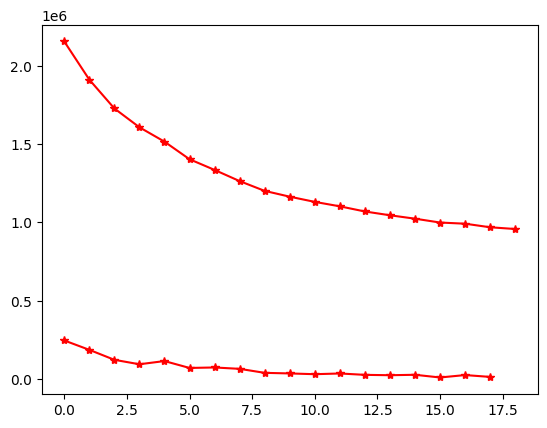

[2159057.2910406226, 1914619.6175501032, 1730184.7025430466, 1609624.9227834675, 1517565.0059723484, 1404986.8264647245, 1336524.3662530652, 1264984.280887239, 1202276.482000585, 1165177.7137062135, 1131861.1850947458, 1103446.1992377024, 1070418.981335931, 1046178.5255676524, 1024302.1835299362, 999621.0162547553, 992176.6982725282, 969299.7667342864, 958192.6812173142]


In [6]:
I =[]

for k in range(1,20):
    km= KMeans(n_clusters=k, random_state=0)
    km.fit(X)
    I.append(km.inertia_)

plt.plot(np.array(I),'r*-')
plt.plot(-np.diff(np.array(I)),'r*-')
plt.show()


print(I)


# K =10 a l'air intéresant l'inertie stagne ensuite, 10?
# 
# Attention l'inertie intra ne fait (en moyenne) que décroitre avec K
# Avec K=n on a une inertie intra qui est nulle! Mais ce n'est pas un bon choix.
# On veut le K, "le plus petit possible" (pour pouvoir interpréter les classes),
# de sorte que l'inertie Intra soit petite (ou se stabilise).


c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\valen\a

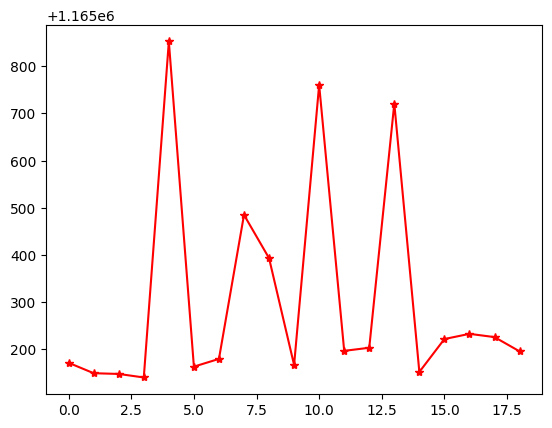

In [7]:
I=[]
for k in range(1,20):
    km= KMeans(n_clusters=10, random_state=2*k)
    km.fit(X)
    I.append(km.inertia_)

plt.plot(I,'r*-')
plt.show()
# Peu d'influence de l'état initial: l'option n_init assure que différents
# centre initiaux sont considérés et que le meilleur résultat est gardé.
# 


# On peut interpréter les centres de classes comme une image que l'on peut tracer
# Si on les trace on reconnais des chiffres.
# La partition permet donc de retrouver le label Y
# Mais elle aurait tout aussi bien pu donner une information de nature différente
# Ex forme de l'écriture, épaisseur du trait.... Et ainsi mélanger les chiffres dans des groupes.


<Figure size 640x480 with 0 Axes>

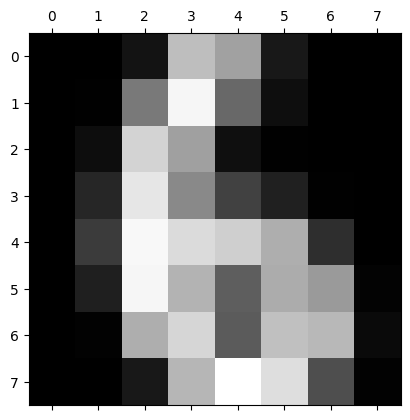

<Figure size 640x480 with 0 Axes>

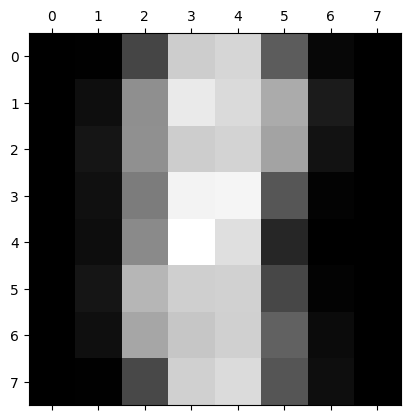

<Figure size 640x480 with 0 Axes>

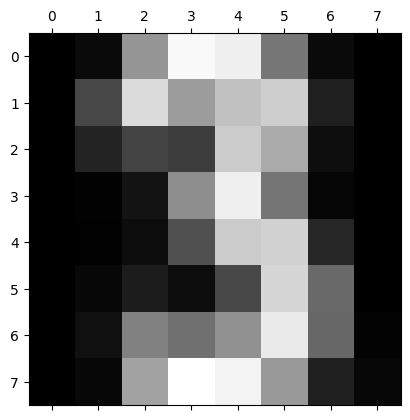

<Figure size 640x480 with 0 Axes>

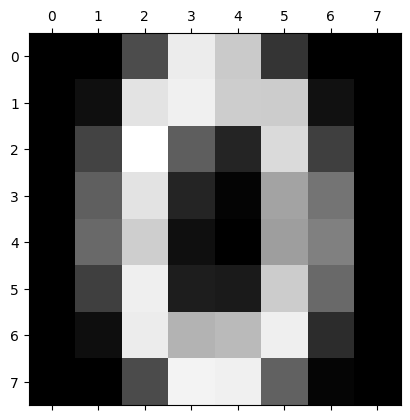

<Figure size 640x480 with 0 Axes>

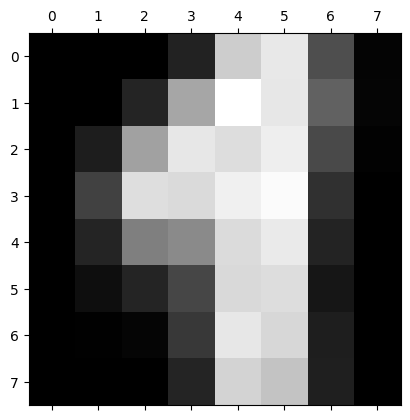

<Figure size 640x480 with 0 Axes>

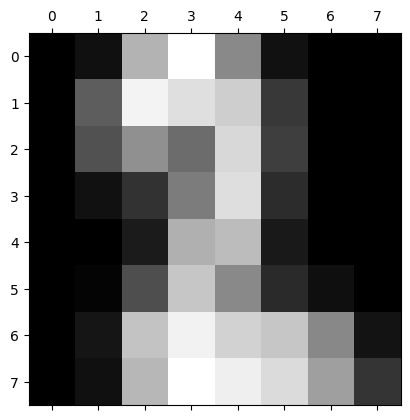

<Figure size 640x480 with 0 Axes>

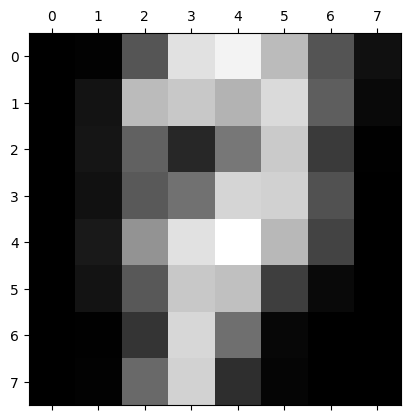

<Figure size 640x480 with 0 Axes>

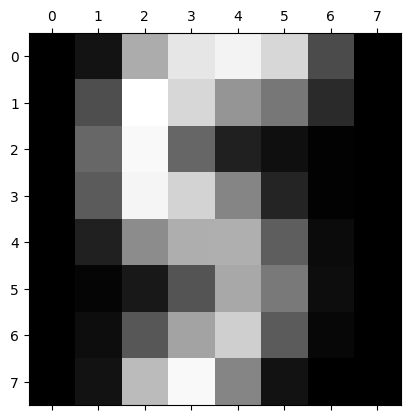

<Figure size 640x480 with 0 Axes>

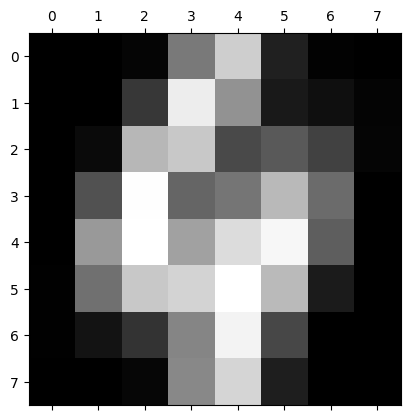

<Figure size 640x480 with 0 Axes>

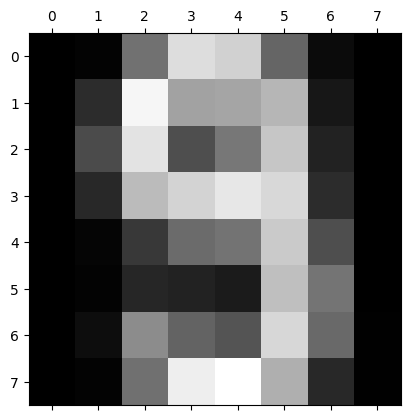

In [8]:
for k in range(10):
    plt.gray() 
    plt.matshow(km.cluster_centers_[k].reshape((8,8))) 
    plt.show()


In [9]:
# # Classification Ascendante Hierarchique
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

ward = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters =None)
ward.fit(X)
ward.labels_
# np.argmax(ward.distances_)
# np.argmax(np.diff(ward.distances_)[:-1])

# On choisit différente distance entre les groupes (option linkage)
# Ici : seule la distance de ward donne des résultats lisibles: un dendrogramme lisible
# présente un saut d'inertie net qui permet une partition en peu de groupes.


array([1758, 1567, 1252, ...,    1,    2,    0], dtype=int64)

In [10]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


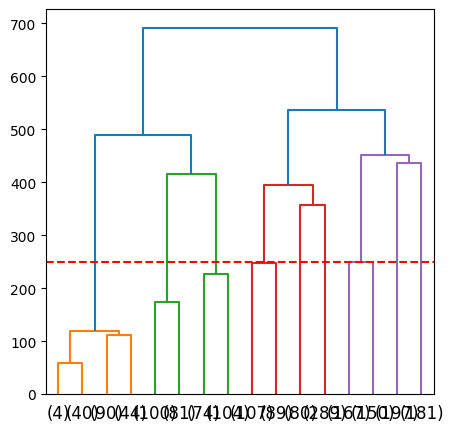

In [11]:
plt.figure(figsize=(5,5))
plot_dendrogram(ward, truncate_mode="level", p=3)
plt.axhline(y = 250, color = 'r', linestyle = '--')
plt.show()


# On a envie de choisir 9 groupes.

# Attention : si le critère d'Aggrégation est mal choisi, on peut avoir des
# dendrogrammes pas du tout interprétable, comme ci-dessous.


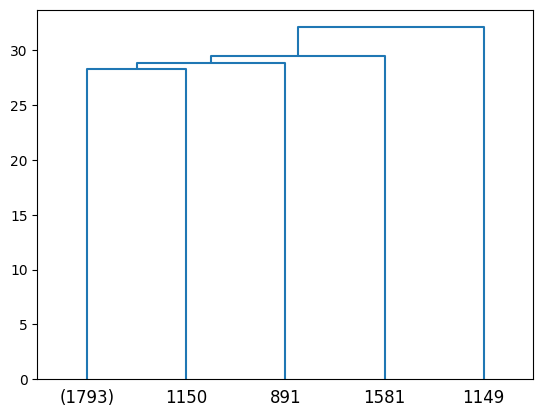

In [12]:
sing = AgglomerativeClustering(linkage='single', distance_threshold=0, n_clusters =None)
sing.fit(X)
plot_dendrogram(sing, truncate_mode="level", p=3)


In [13]:
# Correspondance CAH Kmeans
ward = AgglomerativeClustering(linkage='ward',  n_clusters =10)
ward.fit(X)



# Comme pour Kmeans on peut comparer les groupes obtenus avec ceux de Y et de K means
# Les résultats sont un peu meilleur pour CAH que pour Kmeans, mais restent assez similaire
# (c'est une bonne nouvelle les algorithmes sont censés faire la même chose!)
pd.crosstab(Y, ward.labels_)



pd.crosstab(Y, pred)


pd.crosstab(ward.labels_,pred)


col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,0,0,0,0,138,0,2,0,41,0
1,159,1,0,1,2,0,0,0,154,0
2,14,2,1,173,0,0,0,2,2,3
3,0,188,0,0,3,0,0,5,0,0
4,3,10,0,0,5,7,0,113,52,1
5,0,7,0,0,0,3,166,2,0,0
6,0,0,1,0,0,1,0,1,0,178
7,0,0,177,0,0,0,1,0,0,0
8,0,0,0,0,0,76,0,4,0,0


c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


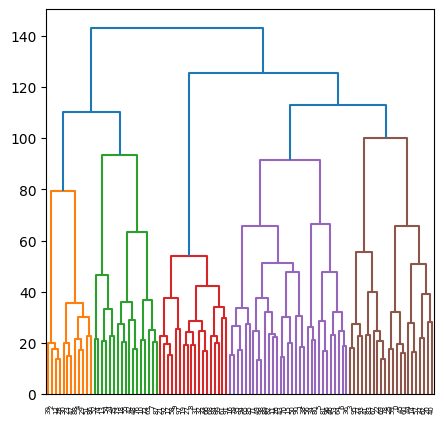

c:\Users\valen\anaconda3\envs\py38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


col_0,0,1,2,3,4,5,6,7,8
row_0,,,,,,,,,
0,0,0,1,177,0,0,0,0,0
1,2,0,0,0,25,1,0,99,55
2,0,12,0,1,150,0,4,8,2
3,0,163,0,0,1,2,10,7,0
4,0,0,163,0,0,0,9,2,7
5,2,40,2,0,0,138,0,0,0
6,177,0,0,1,0,0,0,2,1
7,0,0,0,0,0,0,175,2,2
8,2,47,0,1,4,4,7,103,6


In [14]:
# # Méthode mixte


km= KMeans(n_clusters=100)
km.fit(X)

ward = AgglomerativeClustering(linkage='ward', distance_threshold=0, n_clusters =None)
ward.fit(km.cluster_centers_)
plt.figure(figsize=(5,5))
plot_dendrogram(ward)
plt.show()

km_opt= KMeans(n_clusters=9, random_state=0)
km_opt.fit(X)
km_opt.inertia_


pd.crosstab(Y,km_opt.labels_)
